In [1]:
import pandas as pd
import lasio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
las=lasio.read("University_of_Utah_Forge_56_32_ThrubitDipole_Aniso_analysis_result_3452-9050ft_LAS.las")
df=las.df()
df.head()

,AZIM,BS_RM,C1_24,DEVI,DTCO_MPS_R,DTSH_FAST,DTSH_SLOW,FSA_ERRMINUS,FSA_ERRPLUS,FSA_NAZ_IN,FSA_TOH,GR_TMG,MAXXENE_OVERALL,MINXENE_OVERALL,PR_FAST,RB,SENSOR_AZIM_QCI,SLOANI,SPHI,TDIF_ALT_OVERALL,TDIF_ORG_OVERALL,TIMANI,TNPH,TW_B_L6,TW_E_L6,VPVS_FAST,XENEDIF
MD,,,,,,,,,,,,,,,,,,,,,,,,,,,
3452.0,0.0,8.75,8.9774,2.8034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.2895,NaN,NaN,NaN,312.53,NaN,NaN,NaN,NaN,NaN,NaN,0.1263,998.7773,1998.7773,NaN,NaN
3452.5,0.0,8.75,8.9726,2.6300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.1914,NaN,NaN,NaN,312.53,NaN,NaN,NaN,NaN,NaN,NaN,0.1341,998.7773,1998.7773,NaN,NaN
3453.0,0.0,8.75,8.9669,2.7123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.4440,NaN,NaN,NaN,311.87,NaN,NaN,NaN,NaN,NaN,NaN,0.1384,998.7773,1998.7773,NaN,NaN
3453.5,0.0,8.75,8.9632,2.7898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.8437,NaN,NaN,NaN,311.87,NaN,NaN,NaN,NaN,NaN,NaN,0.1456,998.7773,1998.7773,NaN,NaN
3454.0,0.0,8.75,8.9603,2.8729,52.7234,98.3777,99.3549,NaN,NaN,NaN,NaN,84.7917,NaN,NaN,0.2985,311.96,NaN,0.9884,0.0362,NaN,NaN,NaN,0.1558,998.7773,1998.7773,1.8659,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11197 entries, 3452.0 to 9050.0
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AZIM              11197 non-null  float64
 1   BS_RM             11197 non-null  float64
 2   C1_24             11197 non-null  float64
 3   DEVI              11197 non-null  float64
 4   DTCO_MPS_R        11166 non-null  float64
 5   DTSH_FAST         11176 non-null  float64
 6   DTSH_SLOW         11176 non-null  float64
 7   FSA_ERRMINUS      11178 non-null  float64
 8   FSA_ERRPLUS       11178 non-null  float64
 9   FSA_NAZ_IN        1315 non-null   float64
 10  FSA_TOH           11178 non-null  float64
 11  GR_TMG            11197 non-null  float64
 12  MAXXENE_OVERALL   11178 non-null  float64
 13  MINXENE_OVERALL   11178 non-null  float64
 14  PR_FAST           11166 non-null  float64
 15  RB                11173 non-null  float64
 16  SENSOR_AZIM_QCI   11180 non-null  float

### 📘 Column Descriptions:

1. **MD**: *Measured Depth* — The depth along the path of the wellbore. This should typically be the primary index of the LAS file data.

2. **AZIM**: *Azimuth* — Direction of the wellbore path or toolface relative to North (usually in degrees).

3. **BS_RM**: *Bit Size (Remarks/Memory?)* — Recorded bit size used for this section (in inches). Useful context for hole size.

4. **C1_24**: *(Tool Specific)* — Likely related to sonic tool processing or amplitudes, possibly for Cement Bond Log (CBL) type analysis or a specific component of the dipole signal. Needs tool-specific documentation for certainty.

5. **DEVI**: *Deviation* — Angle of the borehole inclination relative to vertical (0° = vertical).

6. **DTCO_MPS_R**: *Delta Time Compressional (µs/ft, Remarks/Processed?)* — Compressional wave slowness (1/Vp). A fundamental measurement for lithology identification and porosity calculation.  
   🔹 High values = slow formation (e.g., shale)  
   🔹 Low values = fast formation (e.g., tight carbonate)  
   ➤ Key Lithology Log.

7. **DTSH_FAST**: *Delta Time Shear Fast (µs/ft)* — Slowness of the fast shear wave component in an anisotropic formation. Used in rock mechanics and anisotropy analysis.

8. **DTSH_SLOW**: *Delta Time Shear Slow (µs/ft)* — Slowness of the slow shear wave component in an anisotropic formation.  
   **FSA_ERRMINUS, FSA_ERRPLUS**: *Fast Shear Azimuth Error (Minus/Plus)* — Quality control indicators for the fast shear azimuth calculation.

9. **FSA_NAZ_IN**: *Fast Shear Azimuth (North Azimuth Input?)* — Azimuth/direction of the fast shear wave polarization. Often related to stress orientation.

10. **FSA_TOH**: *Fast Shear Azimuth (Tool Orientation Header?)* — Fast shear azimuth relative to a tool reference (like tool high side).

11. **GR_TMG**: *Gamma Ray (Tool Mnemonic?)* — Total Gamma Ray count (API units). Measures natural radioactivity.  
   ➤ Essential for differentiating lithologies (e.g., shale vs. sand/carbonate).  
   ➤ **Your primary target log.**

12. **MAXXENE_OVERALL, MINXENE_OVERALL**: *Maximum/Minimum Cross Energy Overall?* — Quality indicators related to the processing of dipole shear wave energy.

13. **PR_FAST**: *Poisson's Ratio (Fast)* — Calculated from compressional (DTCO) and fast shear (DTSH_FAST) slownesses. Rock property related to compressibility.

14. **RB**: *Radius of Borehole?* — Likely a caliper measurement or calculated borehole radius (in inches).

15. **SENSOR_AZIM_QCI**: *Sensor Azimuth Quality Control Indicator* — Quality flag for the tool's azimuth measurement.

16. **SLOANI**: *Slowness Anisotropy* — Quantitative measure of the difference between slow and fast shear slownesses. Indicates the degree of velocity anisotropy.

17. **SPHI**: *Sonic Porosity?* — Porosity estimated from the compressional slowness (DTCO), assuming a matrix type.  
   **TDIF_ALT_OVERALL, TDIF_ORG_OVERALL**: *Time Difference (Alternative/Original Overall?)* — Processing quality indicators related to shear wave arrival time picking.

18. **TIMANI**: *Time Anisotropy* — Measure of shear wave time splitting, related to SLOANI.

19. **TNPH**: *Thermal Neutron Porosity (Hydrogen Index)* — Log response related to hydrogen concentration, primarily interpreted as porosity (unitless or %).  
   ➤ **Key Lithology/Porosity Log.**

20. **TW_B_L6, TW_E_L6**: *Time Window Begin/End (Layer 6?)* — Parameters used in the sonic waveform processing.

21. **VPVS_FAST**: *Vp/Vs Ratio (Fast Shear)* — Ratio of compressional velocity to fast shear velocity. Important rock physics parameter.

22. **XENEDIF**: *Cross Energy Difference?* — Quality indicator related to dipole shear wave processing.


**Key Logs/columns for Lithology Identification**: MD, GR_TMG, DTCO_MPS_R, TNPH, DEVI.

In [4]:
df['MD']=df.index
df=df[['MD','GR_TMG', 'DTCO_MPS_R','TNPH', 'DEVI']]
df.head()

,MD,GR_TMG,DTCO_MPS_R,TNPH,DEVI
MD,,,,,
3452.0,3452.0,80.2895,NaN,0.1263,2.8034
3452.5,3452.5,84.1914,NaN,0.1341,2.6300
3453.0,3453.0,89.4440,NaN,0.1384,2.7123
3453.5,3453.5,88.8437,NaN,0.1456,2.7898
3454.0,3454.0,84.7917,52.7234,0.1558,2.8729


In [5]:
for i in df.columns:
    print(f"{i}: {df[i].isnull().sum()}")

MD: 0
GR_TMG: 0
DTCO_MPS_R: 31
TNPH: 0
DEVI: 0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MD,11197.0,6251.000000,1616.219908,3452.0000,4851.500000,6251.0000,7650.500000,9050.0000
GR_TMG,11197.0,168.644677,79.440749,6.6033,97.648000,165.5315,228.862700,459.1759
DTCO_MPS_R,11166.0,53.974110,2.438965,46.3279,52.876625,53.6574,54.518875,86.0415
TNPH,11197.0,0.044219,0.036122,-0.0069,0.023200,0.0339,0.056200,0.2973
DEVI,11197.0,1.774719,0.710931,0.0000,1.271500,1.7311,2.090900,4.9656


## Data distribution

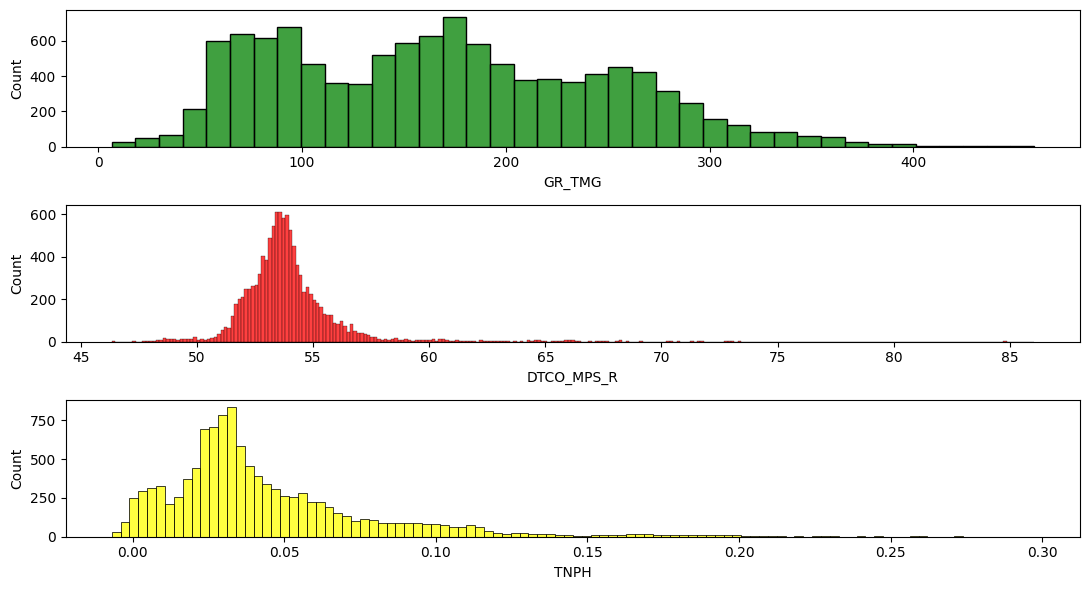

In [7]:
fig, axes=plt.subplots(3,1, figsize=(11,6))
colors=["green", "red", "yellow"]
for idx,col in enumerate(['GR_TMG','DTCO_MPS_R','TNPH']):
    sns.histplot(data=df, x=df[col], ax=axes[idx], color=colors[idx])

plt.tight_layout()

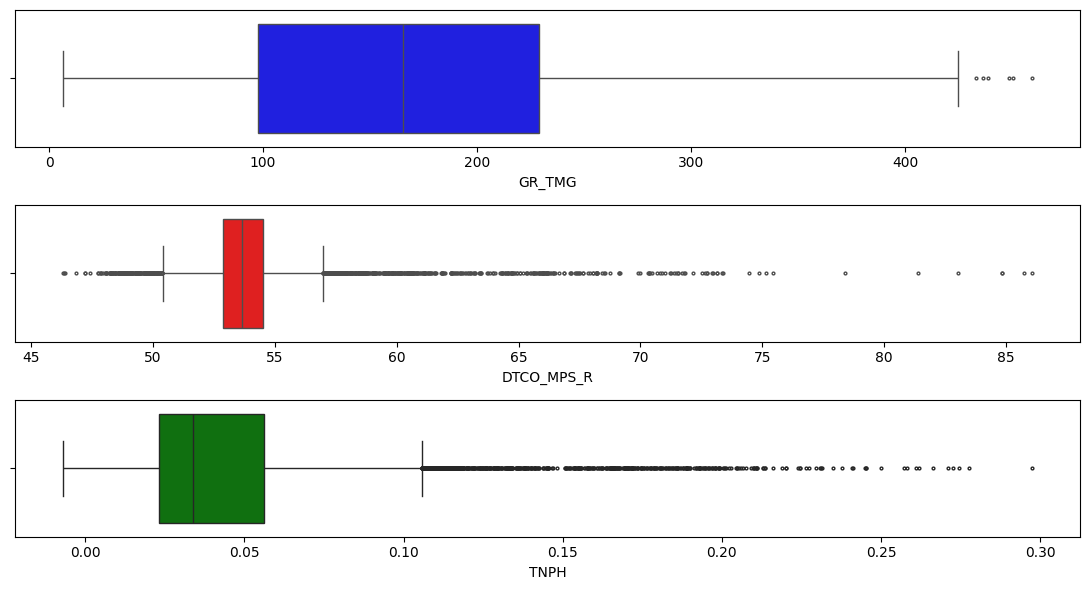

In [8]:
fig, axes=plt.subplots(3,1, figsize=(11,6))
colors=["blue", "red", "green"]
for idx,col in enumerate(['GR_TMG','DTCO_MPS_R','TNPH']):
    sns.boxplot(data=df, x=df[col], ax=axes[idx], fliersize=2, color=colors[idx])

plt.tight_layout()
    

### Notes:

1. Gamma ray (GR_TMG) readings can be considered as normal distribution (slightly left skewed) with only 6 theoretical outlier.
2. TNPH and DTCO values have left skewed distribution.
3. The statistical outliers as representing real variations in the rocks drilled, not as data errors needing removal.


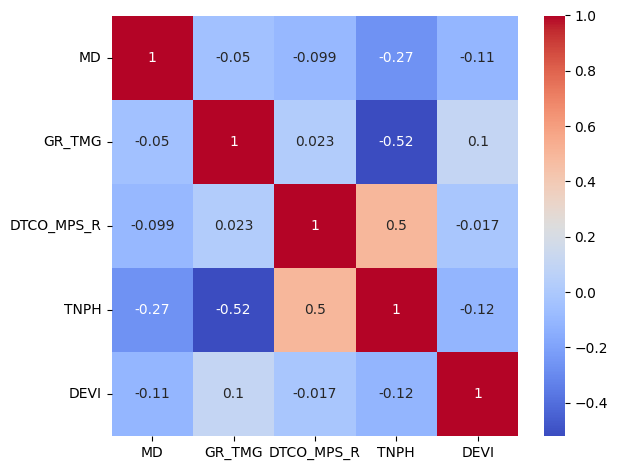

In [9]:
corr_matrix=df.corr()
sns.heatmap(data=corr_matrix,  cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()


## Notes on HeatMap

1. All parameters are negatively corrolated with measured depth (`MD`).
2. `TNPH` and `DTCO` parameters has higher positive correlation compared to others.
3. `TNPH` and `GR_TMG`, on the other hand, has higher negative correlation.



***1. TNPH***: *Thermal Neutron Porosity (Hydrogen Index)* — Log response related to hydrogen concentration, primarily interpreted as porosity (unitless or %).  

***2. DTCO_MPS_R***: *Delta Time Compressional (µs/ft, Remarks/Processed?)* — Compressional wave slowness (1/Vp). A fundamental measurement for lithology identification and porosity calculation.  
   🔹 High values = slow formation (e.g., shale)  
   🔹 Low values = fast formation (e.g., tight carbonate)  
   ➤ Key Lithology Log.

